In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
# PART 1 (Housing Prices)

In [2]:
df = pd.read_csv('House Prediction Data.csv')

In [ ]:
# Type of model
# Fit model to training
# Predict test data
# Evaluate

In [5]:
model = linear_model.LinearRegression()

In [8]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
df = df[['LotArea', 'SalePrice']]

In [13]:
df = df.dropna()

In [14]:
X = df['LotArea']
y = df['SalePrice']

In [21]:
X = X.to_numpy().reshape(1460, 1)
y = y.to_numpy().reshape(1460, 1)

In [25]:
model.fit(X, y)

LinearRegression()

In [28]:
model.predict([[1000]])

array([[160936.12384858]])

Text(0.5, 1.0, 'House Price Linear Regression')

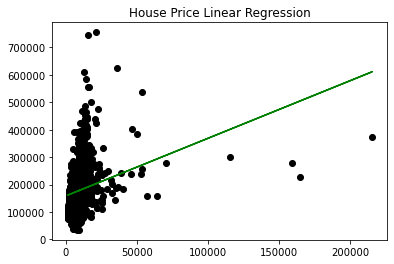

In [36]:
plt.scatter(X, y, color='black')
plt.plot(X, model.predict(X), color='green')
plt.title('House Price Linear Regression')

In [ ]:
# PART 2 (FAKE NEWS)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

In [4]:
df2 = pd.read_csv('news.csv')

In [ ]:
# vectorize data
# split data into train and test
# type of model
# fit model on train
# predict model on test
# evaluate

In [38]:
df2

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligarc...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [37]:
vectorizer = TfidfVectorizer()

In [39]:
df2['title']

0                            You Can Smell Hillary’s Fear
1       Watch The Exact Moment Paul Ryan Committed Pol...
2             Kerry to go to Paris in gesture of sympathy
3       Bernie supporters on Twitter erupt in anger ag...
4        The Battle of New York: Why This Primary Matters
                              ...                        
6330    State Department says it can't find emails fro...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    In Ethiopia, Obama seeks progress on peace, se...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: title, Length: 6335, dtype: object

In [43]:
X = vectorizer.fit_transform(df2['title'])
y = df2['label']

In [42]:
vectorizer.get_feature_names()

['00',
 '000',
 '00pm',
 '01',
 '04',
 '05',
 '06',
 '08',
 '10',
 '100',
 '1000',
 '1000s',
 '100k',
 '100m',
 '100percentfedup',
 '101',
 '106',
 '10k',
 '11',
 '116',
 '117',
 '11th',
 '12',
 '120',
 '122',
 '1227',
 '124th',
 '125',
 '126',
 '12th',
 '13',
 '130',
 '1390',
 '14',
 '140',
 '141',
 '147',
 '15',
 '150',
 '159',
 '16',
 '160',
 '1612',
 '16th',
 '17',
 '170',
 '179',
 '18',
 '180',
 '184',
 '1862',
 '19',
 '1940s',
 '1945',
 '1946',
 '1950',
 '1951',
 '1960s',
 '1970',
 '1980',
 '1980s',
 '1984',
 '199',
 '1990s',
 '1992',
 '1993',
 '1994',
 '1996',
 '1b',
 '1st',
 '20',
 '200',
 '2000',
 '2001',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '200m',
 '200x',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2016ers',
 '2017',
 '2018',
 '202',
 '2020',
 '2050',
 '205m',
 '207',
 '20k',
 '21',
 '211',
 '215',
 '21st',
 '22',
 '220',
 '223',
 '224',
 '225',
 '23',
 '234',
 '237',
 '24',
 '241',
 '25',
 '250',
 '257k',
 '26',
 '27',
 '270'

In [2]:
def convert_label_to_number(label):
    if label == 'FAKE':
        return 1
    else:
        return 0
def plot_points(predictions, answers):
    for i in range(0,len(predictions),20):
        prediction = convert_label_to_number(predictions[i])
        if  predictions[i] == answers.iloc[i]:
            # Correct
            plt.plot(i, prediction, 'go')
        else:
            # Wrong
            plt.plot(i, prediction, 'ro')
    plt.show()
        

In [65]:
kf = KFold(5)

testing on: [   0    1    2 ... 1264 1265 1266]
['FAKE' 'REAL' 'REAL' ... 'FAKE' 'REAL' 'FAKE']
0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
1262    REAL
1263    FAKE
1264    FAKE
1265    REAL
1266    REAL
Name: label, Length: 1267, dtype: object


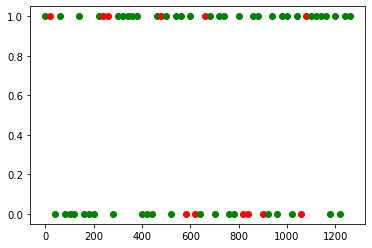

              precision    recall  f1-score   support

        FAKE       0.81      0.88      0.85       634
        REAL       0.87      0.79      0.83       633

    accuracy                           0.84      1267
   macro avg       0.84      0.84      0.84      1267
weighted avg       0.84      0.84      0.84      1267

SCORE: 0.8382004735595896
testing on: [1267 1268 1269 ... 2531 2532 2533]
['REAL' 'FAKE' 'FAKE' ... 'REAL' 'FAKE' 'FAKE']
1267    FAKE
1268    FAKE
1269    REAL
1270    REAL
1271    FAKE
        ... 
2529    FAKE
2530    FAKE
2531    REAL
2532    REAL
2533    FAKE
Name: label, Length: 1267, dtype: object


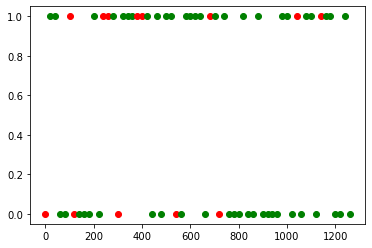

              precision    recall  f1-score   support

        FAKE       0.81      0.86      0.83       663
        REAL       0.84      0.77      0.80       604

    accuracy                           0.82      1267
   macro avg       0.82      0.82      0.82      1267
weighted avg       0.82      0.82      0.82      1267

SCORE: 0.8208366219415943
testing on: [2534 2535 2536 ... 3798 3799 3800]
['REAL' 'REAL' 'FAKE' ... 'REAL' 'REAL' 'REAL']
2534    REAL
2535    REAL
2536    FAKE
2537    FAKE
2538    REAL
        ... 
3796    FAKE
3797    REAL
3798    REAL
3799    REAL
3800    REAL
Name: label, Length: 1267, dtype: object


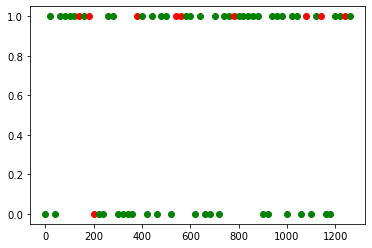

              precision    recall  f1-score   support

        FAKE       0.78      0.87      0.82       595
        REAL       0.87      0.79      0.83       672

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267

SCORE: 0.8255722178374112
testing on: [3801 3802 3803 ... 5065 5066 5067]
['REAL' 'FAKE' 'FAKE' ... 'REAL' 'FAKE' 'REAL']
3801    REAL
3802    FAKE
3803    REAL
3804    REAL
3805    REAL
        ... 
5063    FAKE
5064    FAKE
5065    REAL
5066    FAKE
5067    FAKE
Name: label, Length: 1267, dtype: object


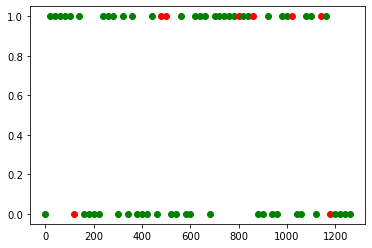

              precision    recall  f1-score   support

        FAKE       0.80      0.86      0.83       628
        REAL       0.85      0.79      0.82       639

    accuracy                           0.82      1267
   macro avg       0.83      0.82      0.82      1267
weighted avg       0.83      0.82      0.82      1267

SCORE: 0.823993685872139
testing on: [5068 5069 5070 ... 6332 6333 6334]
['FAKE' 'REAL' 'FAKE' ... 'FAKE' 'REAL' 'REAL']
5068    FAKE
5069    REAL
5070    REAL
5071    REAL
5072    FAKE
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 1267, dtype: object


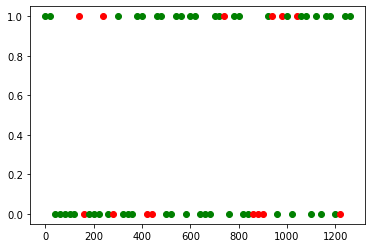

              precision    recall  f1-score   support

        FAKE       0.80      0.86      0.83       644
        REAL       0.84      0.78      0.81       623

    accuracy                           0.82      1267
   macro avg       0.82      0.82      0.82      1267
weighted avg       0.82      0.82      0.82      1267

SCORE: 0.8184688239936859


In [70]:
for train, test in kf.split(X):
    print('testing on:', test)
    model = SVC()
    model.fit(X[train], y.iloc[train])
    predictions = model.predict(X[test])
    answers = y.iloc[test]
    print(predictions)
    print(answers)
    plot_points(predictions, answers)
    print(classification_report(answers, predictions))
    print('SCORE:', model.score(X[test], answers))